In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Install pyspark
!pip install pyspark
#Install findspark
!pip install findspark

In [46]:
# Import findspark and initialize.
import findspark
findspark.init()

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os

# Import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType
from pyspark import SparkFiles

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [52]:
import requests

url = "https://drive.google.com/uc?id=1QX_NN-VWswQilt_v_WTTbMJHJZgzgUM3&export=download"
response = requests.get(url)
with open("/tmp/temp_file.csv", "wb") as f:
    f.write(response.content)

data_df = spark.read.csv("/tmp/temp_file.csv", header=True, inferSchema=True)

# Show Dataframe
data_df.show()

+---+------+--------+-----------------+--------+---------------+--------------+--------------+
|_c0|UNITID|COSTT4_A|GRAD_DEBT_MDN10YR|NPT4_PUB|MN_EARN_WNE_P10|MN_EARN_WNE_P6|MN_EARN_WNE_P8|
+---+------+--------+-----------------+--------+---------------+--------------+--------------+
|  0|100654|   21924| 328.651592227982|   13057|          35500|         28400|         30600|
|  1|100663|   26248| 236.417113118838|   16585|          48400|         39400|         44100|
|  3|100706|   24869| 219.507458615495|   17250|          52000|         40300|         45900|
|  4|100724|   21938| 328.651592227982|   13593|          30600|         24400|         27500|
|  5|100751|   31050| 241.187862038277|   21534|          51600|         42400|         45600|
|  6|100760|   13930| 103.535853216079|    8628|          32400|         25900|         29300|
|  8|100830|   20621| 265.041606635469|   13689|          38000|         32100|         37000|
|  9|100858|   32678| 222.634949573794|   23258|  

In [53]:
import requests

url = "https://drive.google.com/uc?id=1t0crmMdDN0AJxopDj7E6UhOs2MMm-okB&export=download"
response = requests.get(url)
with open("/tmp/temp_file.csv", "wb") as f:
    f.write(response.content)

field_df = spark.read.csv("/tmp/temp_file.csv", header=True, inferSchema=True)

# Show DataFrame
field_df.show()

+---+------+--------------------+--------------------+---------------------+-----------------------+---------------+---------------+---------------+------------+
|_c0|UNITID|              INSTNM|             CIPDESC|DEBT_ALL_PP_EVAL_MEAN|DEBT_ALL_STGP_EVAL_MEAN|EARN_MDN_HI_1YR|EARN_MDN_HI_2YR|EARN_NE_MDN_3YR|EARN_MDN_4YR|
+---+------+--------------------+--------------------+---------------------+-----------------------+---------------+---------------+---------------+------------+
| 66|100663|University of Ala...|Communication and...|                34950|                  22131|          28940|          29517|          33859|       40729|
| 89|100663|University of Ala...|Teacher Education...|                34943|                  22612|          30620|          29882|          33214|       38487|
|119|100663|University of Ala...|Liberal Arts and ...|                23949|                  22633|          29046|          30988|          36764|       41150|
|120|100663|University of Al

In [54]:
data_df.createOrReplaceTempView('table1')
field_df.createOrReplaceTempView('table2')

In [55]:
result_df = spark.sql("SELECT * FROM table1 JOIN table2 ON table1.UNITID = table2.UNITID")
result_df.show()


+---+------+--------+-----------------+--------+---------------+--------------+--------------+---+------+--------------------+--------------------+---------------------+-----------------------+---------------+---------------+---------------+------------+
|_c0|UNITID|COSTT4_A|GRAD_DEBT_MDN10YR|NPT4_PUB|MN_EARN_WNE_P10|MN_EARN_WNE_P6|MN_EARN_WNE_P8|_c0|UNITID|              INSTNM|             CIPDESC|DEBT_ALL_PP_EVAL_MEAN|DEBT_ALL_STGP_EVAL_MEAN|EARN_MDN_HI_1YR|EARN_MDN_HI_2YR|EARN_NE_MDN_3YR|EARN_MDN_4YR|
+---+------+--------+-----------------+--------+---------------+--------------+--------------+---+------+--------------------+--------------------+---------------------+-----------------------+---------------+---------------+---------------+------------+
|232|100663|    null|             null|   43236|          23437|         36117|         38829| 66|100663|University of Ala...|Communication and...|                34950|                  22131|          28940|          29517|          

In [8]:
result_df.createOrReplaceTempView('colleges')

In [9]:

# Get the number of degrees
spark.sql("""
  SELECT
    CIPDESC,
    count(*) AS number_of_degress
  FROM colleges
  GROUP by CIPDESC
  """).show(30)

+--------------------+-----------------+
|             CIPDESC|number_of_degress|
+--------------------+-----------------+
|         Philosophy.|                6|
|Construction Mana...|                5|
|Computer and Info...|               89|
|  Cognitive Science.|                3|
|Family and Consum...|               11|
|English Language ...|              120|
|Linguistic, Compa...|                7|
|Sociology and Ant...|                1|
|Agricultural Prod...|                1|
|        Criminology.|               26|
|Fine and Studio A...|               86|
|Ecology, Evolutio...|               11|
|Electrical/Electr...|                2|
|Natural Resources...|               52|
|Computer Engineer...|               13|
|          Economics.|               66|
|Radio, Television...|               28|
|Computer/Informat...|                7|
| Education, General.|                5|
|Agricultural Busi...|               14|
|Mental and Social...|                9|
|  Homeland Secu

In [10]:
#Get the count of each degree
spark.sql("select count(distinct(CIPDESC)) from colleges").show()

+-----------------------+
|count(DISTINCT CIPDESC)|
+-----------------------+
|                    200|
+-----------------------+



In [11]:
#Get the count of universities/institutions
# Get the number of distinct colleges
spark.sql("select count(distinct(INSTNM)) from colleges").show()

+----------------------+
|count(DISTINCT INSTNM)|
+----------------------+
|                   516|
+----------------------+



In [12]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Index the string columns using StringIndexer
indexer1 = StringIndexer(inputCol="CIPDESC", outputCol="CIPDESC_index")
indexer2 = StringIndexer(inputCol="INSTNM", outputCol="INSTNM_index")

# One-hot encode the indexed columns
encoder = OneHotEncoder(inputCols=["CIPDESC_index", "INSTNM_index"],
                        outputCols=["CIPDESC_vec", "INSTNM_vec"])

# Define a pipeline to streamline the transformations
pipeline = Pipeline(stages=[indexer1, indexer2, encoder])

# Apply the transformations
encoded_df = pipeline.fit(result_df).transform(result_df)

In [13]:
assembler = VectorAssembler(
    inputCols=["CIPDESC_vec", "INSTNM_vec", "COSTT4_A", "GRAD_DEBT_MDN10YR", "NPT4_PUB", "MN_EARN_WNE_P10", "MN_EARN_WNE_P8", "DEBT_ALL_PP_EVAL_MEAN", "DEBT_ALL_STGP_EVAL_MEAN", "EARN_MDN_HI_1YR", "EARN_MDN_HI_2YR", "EARN_NE_MDN_3YR", "EARN_MDN_4YR" ],
    outputCol="features"
)

data_ready = assembler.transform(encoded_df)

In [14]:
#Train and Test the data

train_df, test_df = data_ready.randomSplit([0.8, 0.2], seed=42)


In [15]:
#Run the linear regresstion using PySpark's MLLib
from pyspark.ml.regression import LinearRegression

# Define the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="MN_EARN_WNE_P6")

# Fit the model
lr_model = lr.fit(train_df)

# Make predictions
predictions_df = lr_model.transform(test_df)

# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions_df)
print(f"Mean Squared Error (MSE) on test data: {mse}")


Mean Squared Error (MSE) on test data: 221403.78291786116


In [16]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions_df)
print(f"R-squared: {r2}")


R-squared: 0.9940637646933256


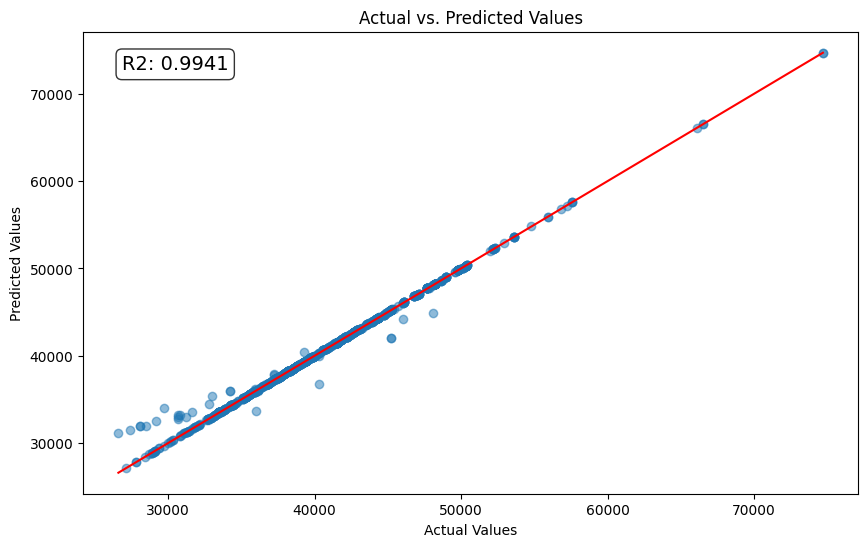

In [17]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual_values = predictions_df.select("MN_EARN_WNE_P6").rdd.flatMap(lambda x: x).collect()
predicted_values = predictions_df.select("prediction").rdd.flatMap(lambda x: x).collect()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red')
plt.text(0.05, 0.95, f'R2: {r2:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()


In [18]:
#Define and train RandomForestRegressor
from pyspark.ml.regression import RandomForestRegressor

# Define the regressor
rf_regressor = RandomForestRegressor(featuresCol='features', labelCol='MN_EARN_WNE_P6', numTrees=100)

# Train the regressor
rf_model = rf_regressor.fit(train_df)

In [28]:
#Predict on the test data
# Make predictions
predictions_df = rf_model.transform(test_df)

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

# Compute RMSE
evaluator_rmse = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions_df)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 1276.89


In [30]:
#Compute R2 value
evaluator_r2 = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="r2")
fr_r2 = evaluator_r2.evaluate(predictions_df)
print(f"R-squared: {r2}")

R-squared: 0.9940637646933256


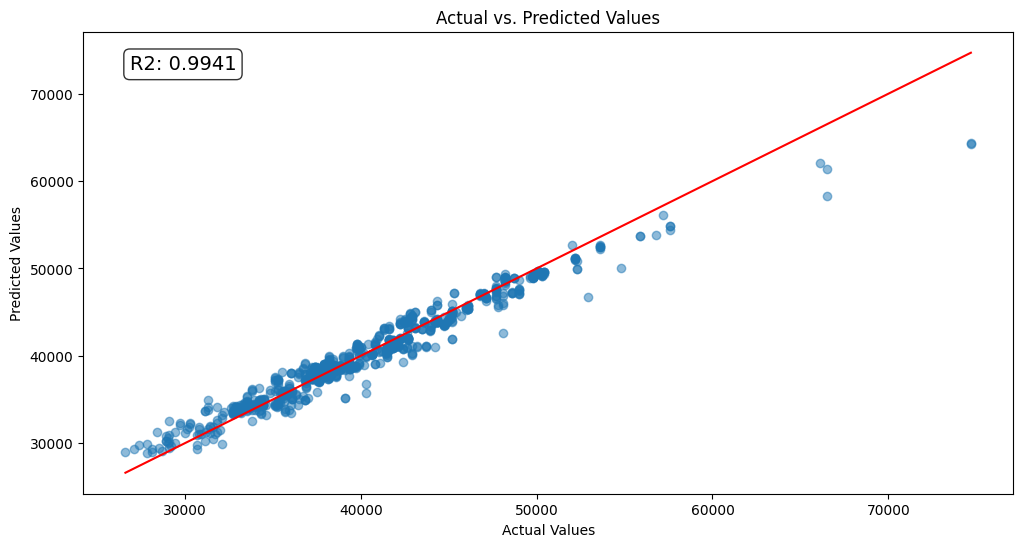

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for visualization
pdf = predictions_df.select("MN_EARN_WNE_P6", "prediction").toPandas()

plt.figure(figsize=(12, 6))
plt.scatter(pdf["MN_EARN_WNE_P6"], pdf["prediction"], alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red')
plt.text(0.05, 0.95, f'R2: {r2:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

In [32]:
#Optimize the model

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol='MN_EARN_WNE_P6')

In [33]:
#Define the parameters
from pyspark.ml.tuning import ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 200])  # number of trees
             .addGrid(rf.maxDepth, [5, 10, 20])  # maximum depth
             .addGrid(rf.maxBins, [32, 64, 100])  # Number of bins for discretizing continuous features
             .build())

In [34]:
#Define the evaluation metric
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="rmse")

In [35]:
#setup crossvalidator
from pyspark.ml.tuning import CrossValidator

crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

In [36]:
#Run the crossvalidator and find the best model
cvModel = crossval.fit(train_df)
best_rf_model = cvModel.bestModel

#Print the optimal parameters:
print(f"Best number of trees: {best_rf_model.getNumTrees}")
print(f"Best max depth: {best_rf_model.getOrDefault('maxDepth')}")
print(f"Best max bins: {best_rf_model.getOrDefault('maxBins')}")

Best number of trees: 100
Best max depth: 20
Best max bins: 64


In [37]:
predictions = best_rf_model.transform(test_df)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse:.2f}")

Root Mean Squared Error (RMSE) on test data: 408.13


In [38]:
from pyspark.ml.evaluation import RegressionEvaluator

# Use the best model to make predictions on the test data (assuming you've already done this)
predictions = best_rf_model.transform(test_df)

# Evaluate the model using R-squared metric
r2_evaluator = RegressionEvaluator(labelCol="MN_EARN_WNE_P6", predictionCol="prediction", metricName="r2")
r2_value = r2_evaluator.evaluate(predictions)

print(f"R-squared on test data = {r2_value:.2f}")

R-squared on test data = 1.00


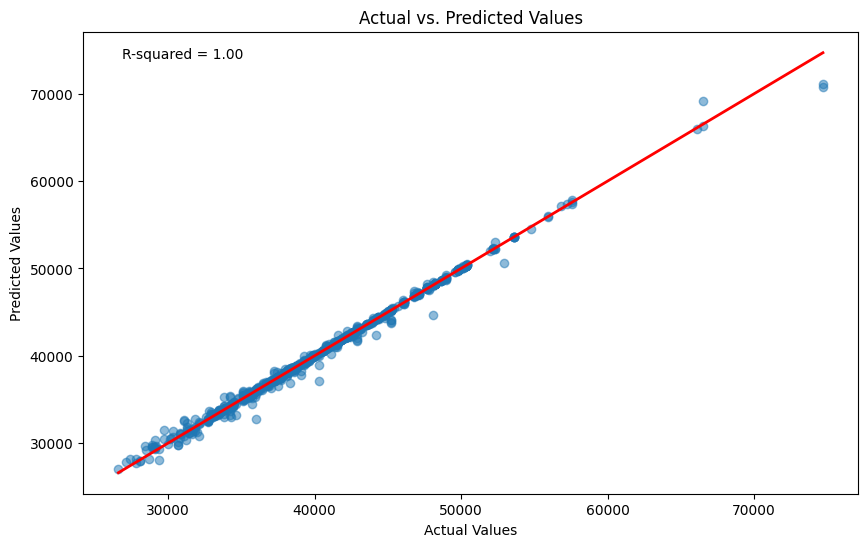

In [39]:
actual = predictions.select("MN_EARN_WNE_P6").toPandas()
predicted = predictions.select("prediction").toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted
plt.scatter(actual, predicted, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot the line for perfect predictions
plt.plot([min(actual["MN_EARN_WNE_P6"]), max(actual["MN_EARN_WNE_P6"])],
         [min(actual["MN_EARN_WNE_P6"]), max(actual["MN_EARN_WNE_P6"])],
         color="red", linewidth=2)

# Display R-squared value on the plot
plt.text(0.05, 0.95, f'R-squared = {r2_value:.2f}', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()